# 1. Expoloratory Analysis of Dataset

This notebook performs an exploratory analysis of the spotify dataset that has just been generated by calling the Spotify API through SpotiPy. It has allowed me to gain a more detailed understanding of what each of the audio features means before moving on to using this dataset to build predictive models.

The analysis is laid out over the following sections:

- 1.1 Investigating Dataset's Structure
- 1.2 Audio Feature Distributions
- 1.3 Song Feature Yearly Trends
- 1.4 Correlation of Audio Features
- 1.5 Correleation of Popularity with Audio Features 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
import sys

In [2]:
drive.mount('/content/gdrive', force_remount=True)
sys.path.append('/content/gdrive/MyDrive/spotify/scripts/')
%cd /content/gdrive/MyDrive/spotify/scripts/

Mounted at /content/gdrive
/content/gdrive/MyDrive/spotify/scripts


## 1.1 Investigating Dataset's Structure

In [12]:
df = pd.read_csv("../data/master_data.csv")
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))

print(f"SHAPE: {df.shape}")
print(f"COLUMNS: {list(df.columns)}")
df[df["album"] == "What Kinda Music"].head()

SHAPE: (71292, 19)
COLUMNS: ['artist_name', 'album', 'track_number', 'id', 'name', 'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'release_date', 'popularity', 'year']


,artist_name,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,release_date,popularity,year
46760,Yussef Dayes,What Kinda Music,1,47w6S27JF4Zvrz1Wd6R66Z,What Kinda Music,spotify:track:47w6S27JF4Zvrz1Wd6R66Z,0.053200,0.523,0.560,0.830,0.0981,-9.423,0.1450,96.167,0.151,230470.0,2020-04-24,56,2020
46761,Yussef Dayes,What Kinda Music,2,2lXFtsU8naRn2mC0DACJEl,Festival,spotify:track:2lXFtsU8naRn2mC0DACJEl,0.322000,0.414,0.478,0.396,0.0773,-11.783,0.0509,152.050,0.129,282408.0,2020-04-24,51,2020
46762,Yussef Dayes,What Kinda Music,3,5TgZ7lOUugOdabBcD9a6ud,Nightrider,spotify:track:5TgZ7lOUugOdabBcD9a6ud,0.077400,0.729,0.571,0.213,0.0994,-9.188,0.0869,81.486,0.582,300990.0,2020-04-24,61,2020
46763,Yussef Dayes,What Kinda Music,4,4Goj7amQLl2PiPYaiB0VlV,Tidal Wave,spotify:track:4Goj7amQLl2PiPYaiB0VlV,0.045800,0.533,0.487,0.833,0.1130,-8.790,0.0520,141.427,0.339,249427.0,2020-04-24,56,2020
46764,Yussef Dayes,What Kinda Music,5,5oEhWt6RfUHSBiSfZVnymh,Sensational,spotify:track:5oEhWt6RfUHSBiSfZVnymh,0.000374,0.485,0.636,0.563,0.2110,-8.750,0.0340,95.199,0.233,84920.0,2020-04-24,45,2020


In [4]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,popularity,year
count,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,71292.000000,7.102200e+04,71292.000000,71292.00000
mean,7.881389,0.311502,0.578490,0.592048,0.145762,0.249394,-9.067499,0.119570,117.317459,0.479041,2.407547e+05,30.080766,2010.39414
std,5.672300,0.314018,0.177695,0.229561,0.292372,0.235124,4.610795,0.132837,29.758444,0.245410,1.085476e+05,15.218917,12.06896
min,1.000000,0.000001,0.000000,0.000020,0.000000,0.000000,-48.474000,0.000000,0.000000,0.000000,1.357800e+04,11.000000,1961.00000
25%,4.000000,0.038300,0.454000,0.438000,0.000000,0.101000,-11.039000,0.037900,93.635000,0.284000,1.838062e+05,18.000000,2007.00000
50%,7.000000,0.185000,0.590000,0.616000,0.000145,0.140000,-8.016000,0.057500,115.025000,0.474000,2.265600e+05,27.000000,2015.00000
75%,11.000000,0.547000,0.713000,0.772000,0.058625,0.313000,-5.950000,0.150000,136.438250,0.671000,2.777035e+05,39.000000,2019.00000
max,50.000000,0.996000,0.987000,0.999000,0.998000,1.000000,0.497000,0.967000,242.965000,0.995000,4.497994e+06,97.000000,2021.00000


In [5]:
top_500_songs = df.sort_values(by="popularity", ascending=False).head(500)
top_500_songs.head(10)

,artist_name,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,release_date,popularity,year
63091,Justin Bieber,Justice,12,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),spotify:track:4iJyoBOLtHqaGxP12qzhQI,0.32100,0.677,0.696,0.000000,0.4200,-6.181,0.1190,90.030,0.464,198081.0,2021-03-19,97,2021
65326,The Weeknd,After Hours,9,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.00146,0.514,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334,200040.0,2020-03-20,94,2020
5224,Dua Lipa,Future Nostalgia,12,5nujrmhLynf4yMoMtj8AQF,Levitating (feat. DaBaby),spotify:track:5nujrmhLynf4yMoMtj8AQF,0.00883,0.702,0.825,0.000000,0.0674,-3.787,0.0601,102.977,0.915,203064.0,2020-03-27,92,2020
65328,The Weeknd,After Hours,11,5QO79kh1waicV47BqGRL3g,Save Your Tears,spotify:track:5QO79kh1waicV47BqGRL3g,0.02120,0.680,0.826,0.000012,0.5430,-5.487,0.0309,118.051,0.644,215626.0,2020-03-20,91,2020
21193,Doja Cat,Hot Pink,9,60ynsPSSKe6O3sfwRnIBRf,Streets,spotify:track:60ynsPSSKe6O3sfwRnIBRf,0.20800,0.749,0.463,0.037100,0.3370,-8.433,0.0828,90.028,0.190,226986.0,2019-11-07,89,2019
18704,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,0.75100,0.501,0.405,0.000000,0.1050,-5.679,0.0319,109.891,0.446,182160.0,2019-05-17,88,2019
36362,DaBaby,BLAME IT ON BABY,7,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),spotify:track:7ytR5pFWmSjzHJIeQkgog4,0.24700,0.746,0.690,0.000000,0.1010,-7.956,0.1640,89.977,0.497,181733.0,2020-04-17,88,2020
54841,Ariana Grande,Positions,12,35mvY5S1H3J2QZyna3TFe0,positions,spotify:track:35mvY5S1H3J2QZyna3TFe0,0.46800,0.737,0.802,0.000000,0.0931,-4.771,0.0878,144.015,0.682,172324.0,2020-10-30,88,2020
31136,Post Malone,Hollywood's Bleeding,6,21jGcNKet2qwijlDFuPiPb,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,0.19200,0.695,0.762,0.002440,0.0863,-3.497,0.0395,120.042,0.553,215280.0,2019-09-06,88,2019
21160,Doja Cat,Planet Her,8,0k4d5YPDr1r7FX77VdqWez,You Right,spotify:track:0k4d5YPDr1r7FX77VdqWez,0.01640,0.828,0.621,0.002330,0.0845,-6.414,0.0565,128.986,0.436,186173.0,2021-06-25,87,2021


## 1.2 Audio Feature Distributions

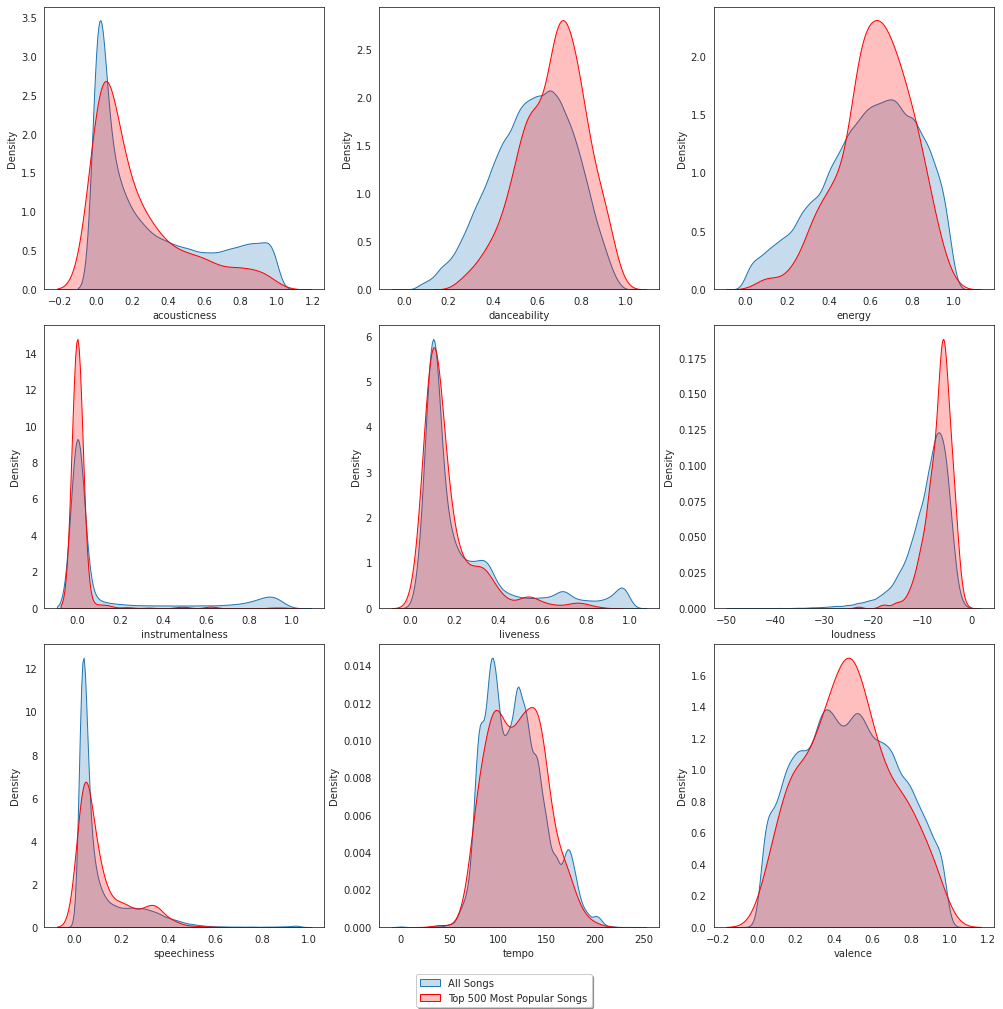

In [6]:
sns.set_style("white")
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
plt.rcParams['figure.figsize'] = (14, 14)
fig, axes = plt.subplots(3,3)

sns.kdeplot(df[audio_features[0]], shade=True, ax=axes[0][0])
sns.kdeplot(df[audio_features[1]], shade=True, ax=axes[0][1])
sns.kdeplot(df[audio_features[2]], shade=True, ax=axes[0][2])
sns.kdeplot(df[audio_features[3]], shade=True, ax=axes[1][0])
sns.kdeplot(df[audio_features[4]], shade=True, ax=axes[1][1])
sns.kdeplot(df[audio_features[5]], shade=True, ax=axes[1][2])
sns.kdeplot(df[audio_features[6]], shade=True, ax=axes[2][0])
sns.kdeplot(df[audio_features[7]], shade=True, ax=axes[2][1])
sns.kdeplot(df[audio_features[8]], shade=True, ax=axes[2][2])

sns.kdeplot(top_500_songs[audio_features[0]], color="red", shade=True, ax=axes[0][0])
sns.kdeplot(top_500_songs[audio_features[1]], color="red", shade=True, ax=axes[0][1])
sns.kdeplot(top_500_songs[audio_features[2]], color="red", shade=True, ax=axes[0][2])
sns.kdeplot(top_500_songs[audio_features[3]], color="red", shade=True, ax=axes[1][0])
sns.kdeplot(top_500_songs[audio_features[4]], color="red", shade=True, ax=axes[1][1])
sns.kdeplot(top_500_songs[audio_features[5]], color="red", shade=True, ax=axes[1][2])
sns.kdeplot(top_500_songs[audio_features[6]], color="red", shade=True, ax=axes[2][0])
sns.kdeplot(top_500_songs[audio_features[7]], color="red", shade=True, ax=axes[2][1])
sns.kdeplot(top_500_songs[audio_features[8]], color="red", shade=True, ax=axes[2][2])


legend = fig.legend(['All Songs', 'Top 500 Most Popular Songs'], loc="lower center", fontsize="medium", borderaxespad=0.2, bbox_to_anchor=(0.5, 0), shadow=True)
bbox = legend.get_window_extent(fig.canvas.get_renderer()).transformed(fig.transFigure.inverted())
fig.tight_layout(rect=(0, bbox.y1, 1, 1), h_pad=0.5, w_pad=0.5)
plt.show()

## 1.3 Song Feature Yearly Trends

Some of the high level trends in the average of these audio features can be attributed to industry wide movements. The trends are significantly more noisy in the earlier years due to the lower number of artists in these years. The dataset I have generated based on artists in my Apple Music Library which is skewed to more recent artists results in a smoother averaging after the late 90s.

We are reducing each year down to essentially the "average song" for that year, which is clearly not reflective of the breadth and depth of music released in that year. 

However we can clearly see key macro trends which correleate I would attribute various genre movements:

- Acousticness of music drops from the 60's to a minimum in the 90's, where it seems to have now reached a plateau. This is clearly explained by the increased dominanced of electric instrumentation which reached peak saturation in the late 90's with the rise of modern dance music and EDM.
- Valence, danceabily and energy (which we would expect high scores for all three for disco music) rise from 60's reach a peak in the 80's at the height of the disco movement before plateauing out. i.e. Disco truly is not dead.
- While there is significant noise in this trend, it appears that instrumental music is on the rise with the growing popularity of lo-fi hip hop and ambient music. A slight but sharp increase is observed in the instrumentallness trendline. It is important to note that this peak is massively supressed in the averaging operation due to the fact that instrumental music makes up such a small portion of the overall music catelog available.

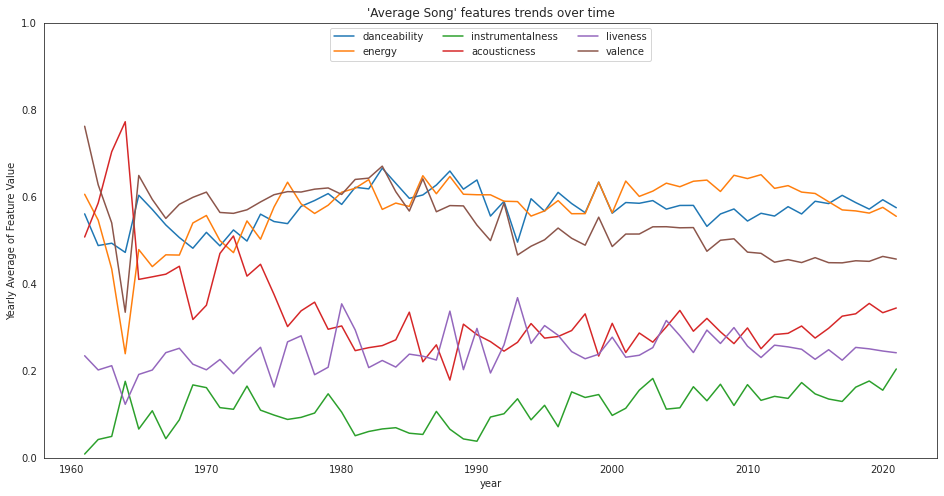

In [33]:
from sklearn.preprocessing import MinMaxScaler

yearly_features = df[[*audio_features, "year"]].groupby("year").mean().sort_values(by="year").reset_index()
# Rescale loudness and tempo to be bounded between 0 & 1.
scaler = MinMaxScaler()
yearly_features["loudness"] = scaler.fit_transform(yearly_features["loudness"].values.reshape(-1,1))
yearly_features["tempo"] = scaler.fit_transform(yearly_features["tempo"].values.reshape(-1,1))

# Let's focus on a few key features to keep the plot legible
key_feats = ['danceability', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'valence']
yearly_features = yearly_features[["year", *key_feats]]

yearly_features_melt = yearly_features.melt(id_vars="year", var_name="Audio Feature", value_name="Yearly Average of Feature Value")


plt.figure(figsize=(16,8))
plt.title("'Average Song' features trends over time")
sns.lineplot(x="year", y="Yearly Average of Feature Value", hue="Audio Feature", data=yearly_features_melt)
plt.legend(loc="upper center", ncol=3)
plt.ylim([0,1])
plt.show()

## 1.4 Correleation of Audio Features

Below plots the correleation of the audio features against eachother. While this doesn't derive any particular insight, it does help to confirm some of the intuitive trends that we would expect for this feature set.

- Acousticness is strongly negatively correleation with energy and valence.
- Loudness has a strong positive correleation with energy.
- Danceability and valency are positively correleated, similarly valence is positively correleated.
- I initialled expected that acousticness would show a very strong positive correleation with instrumentalness. This is clearly an incorrect preconception - as there is no reason why instrumental music can not use electronic instrumentation - instead this reflects moreso on my tastes in instrumental music.

As to be expected due to the complexities of music and breadth of genres and styles, there is not single feature of music that correleates with popularity.

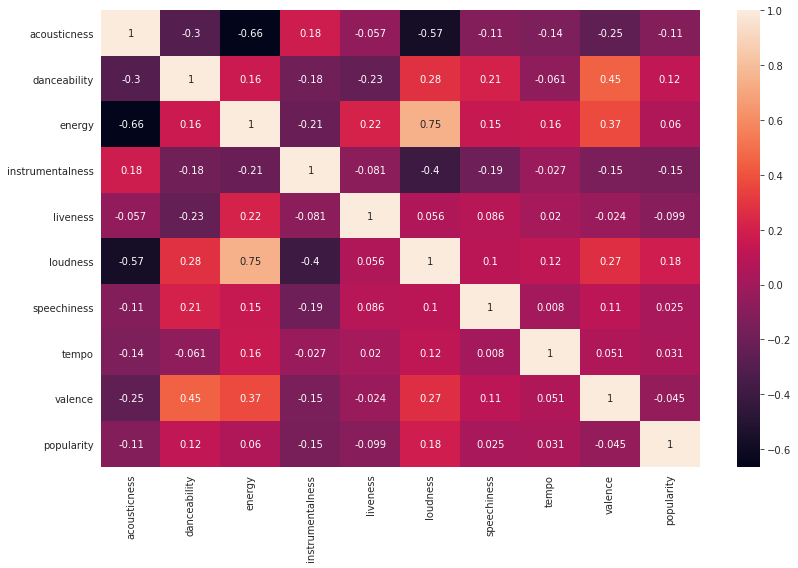

In [14]:
corr = df[[*audio_features, "popularity"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.tight_layout()

## 1.5 Correleation of Popularity with Audio Features

To emphasis this the lack of correleation between popularity and all the features, I plot have produced scatter plots for each audio features.

Each feature is largely uniformily distributed, however a few audio features show some key trends:

- Instrumentalness show two bands of clusters around 0 and 1, as to expected because a song is typically either an instrumental or not.
- Songs typically have a speechiness of > 0.5.
- Unsuprinsingly tempo is generally confined between 50 and 200 bpms.

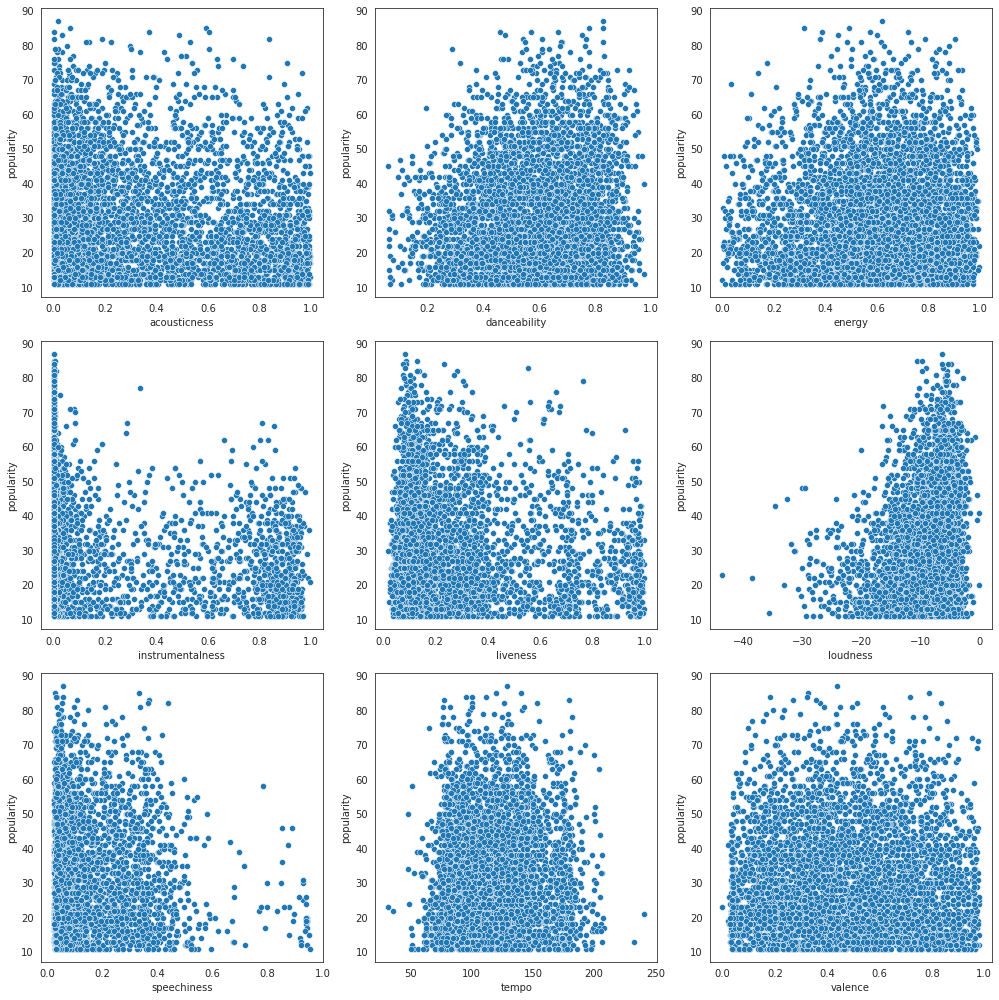

In [10]:
# plot scatter plots of each variable against popularity to identify any macro trends
# Get random 5000 rows to speed up plotting
df = df.sample(n=5000)

fig, axes = plt.subplots(3,3)

sns.scatterplot(x=audio_features[0], y="popularity", data=df, ax=axes[0][0])
sns.scatterplot(x=audio_features[1], y="popularity", data=df, ax=axes[0][1])
sns.scatterplot(x=audio_features[2], y="popularity", data=df, ax=axes[0][2])

sns.scatterplot(x=audio_features[3], y="popularity", data=df, ax=axes[1][0])
sns.scatterplot(x=audio_features[4], y="popularity", data=df, ax=axes[1][1])
sns.scatterplot(x=audio_features[5], y="popularity", data=df, ax=axes[1][2])

sns.scatterplot(x=audio_features[6], y="popularity", data=df, ax=axes[2][0])
sns.scatterplot(x=audio_features[7], y="popularity", data=df, ax=axes[2][1])
sns.scatterplot(x=audio_features[8], y="popularity", data=df, ax=axes[2][2])

plt.tight_layout()
plt.show()

I had intially intended to build a series of machine learning models from simple to complex (i.e. Linear Regression to Neural Net) that would be used to predict a song's popularity score. However from the above it is quick clear that a linear regression model will significantly underfit the dataset. Instead I begin by building a logisitc regression model to predict whether a given song is a hit or not (popularity > 50) and then moving on to more complex algorithms using bagging to account for the class imbalance in the dataset.